<a href="https://colab.research.google.com/github/G-Srinandan/AIML_Projects_and_Labs/blob/main/MODULE_4_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#MODULE 4 LAB 1
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#First we need to define a labeled data set. Let's make a toy dataset.

X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [3]:
#Next we need to add a bias term -1 into the data set.
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y = np.array([-1, -1, 1, 1, 1])

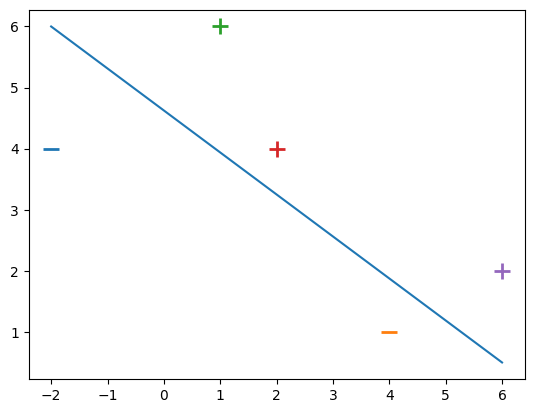

In [4]:
#This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop

In [5]:
#Perceptron algorithm
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [6]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

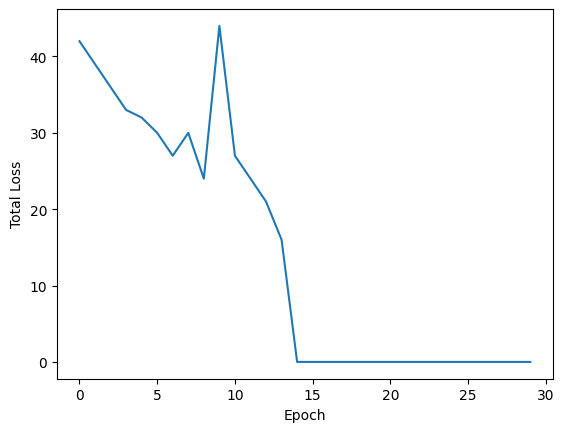

In [7]:
#TRAINING ERROR AT EACH EPOCH
w = perceptron_algo_plot(X, y)

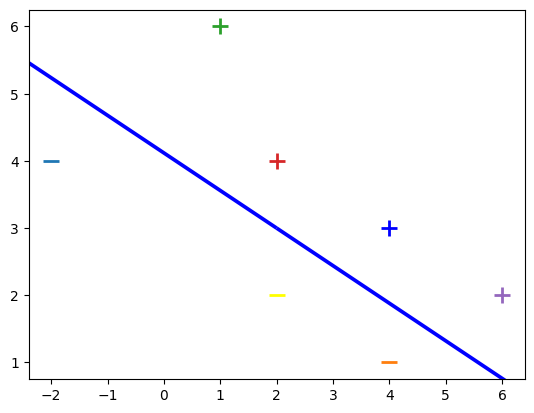

In [8]:
#We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

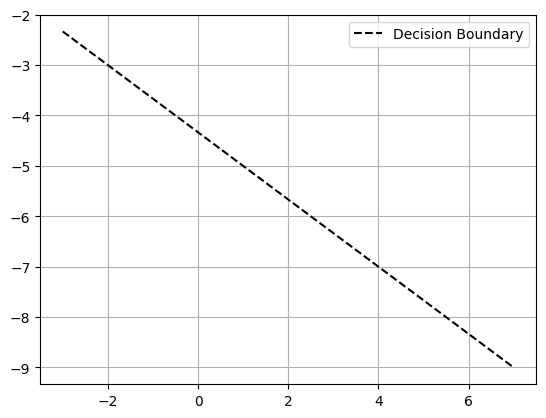

In [9]:
# True decision boundary: w[0]*x + w[1]*y + w[2]*(-1) = 0
# => y = (-w[0]*x + w[2]) / w[1]
import numpy as np

x_vals = np.linspace(-3, 7, 100)
y_vals = -(w[0]*x_vals + w[2]) / w[1]

plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, header=None)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Convert y from {0, 1} → {-1, 1}
y = np.where(y == 0, -1, 1)

# Add bias column
X = np.hstack([X, -1 * np.ones((X.shape[0], 1))])

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


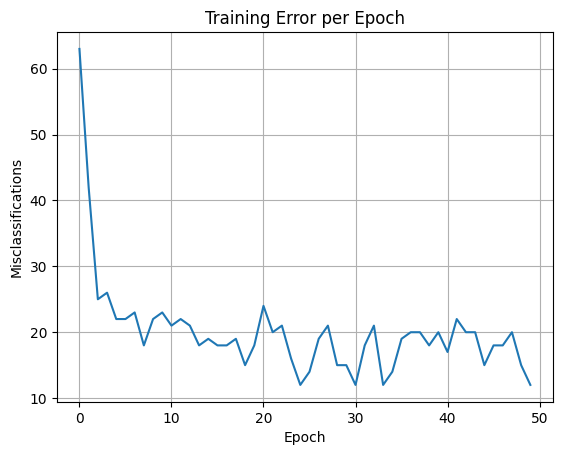

In [11]:
def perceptron_train(X, y, eta=1, epochs=50):
    w = np.zeros(X.shape[1])
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            if y[i] * np.dot(w, X[i]) <= 0:
                w += eta * y[i] * X[i]
                total_error += 1
        errors.append(total_error)
    return w, errors

w, errors = perceptron_train(X_train, y_train, eta=1)

plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Training Error per Epoch")
plt.grid(True)
plt.show()


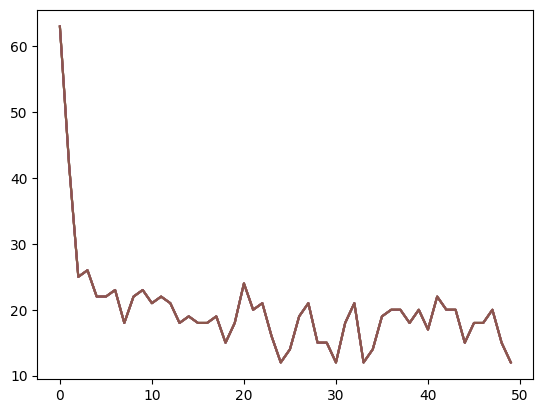

In [12]:
#Changing the learning rate
for lr in [0.1, 0.5, 1, 5, 10, 100]:
    _, err = perceptron_train(X_train, y_train, eta=lr)
    plt.plot(err, label=f'LR={lr}')


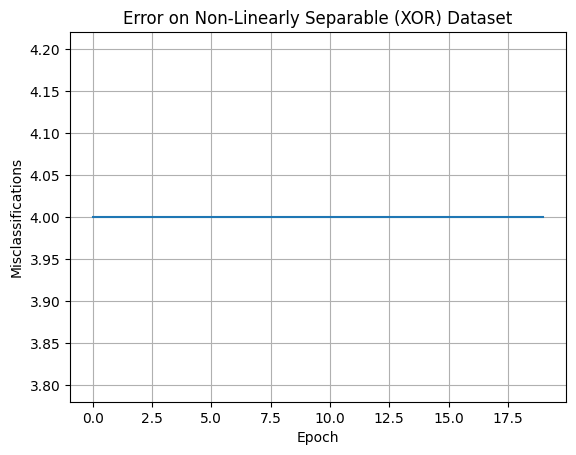

In [13]:
#TOY DATASET
X = np.array([
    [0, 0, -1],
    [0, 1, -1],
    [1, 0, -1],
    [1, 1, -1]
])
y = np.array([-1, 1, 1, -1])  # XOR label: 0->-1, 1->+1

w, errors = perceptron_train(X, y, eta=1, epochs=20)

plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Error on Non-Linearly Separable (XOR) Dataset")
plt.grid(True)
plt.show()
